### Netflix Stock Price Prediction

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Reading the dataset
data = pd.read_csv('Netflix_Stock_DataSet.csv')

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5710 non-null   object 
 1   Open       5710 non-null   float64
 2   High       5710 non-null   float64
 3   Low        5710 non-null   float64
 4   Close      5710 non-null   float64
 5   Adj Close  5710 non-null   float64
 6   Volume     5710 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 312.4+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5.710000e+03
mean,158.724558,161.062392,156.335581,158.756151,158.756151,1.532551e+07
std,208.336043,211.079642,205.499460,208.330538,208.330538,1.846796e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.251786,4.343928,4.168214,4.255000,4.255000,5.487625e+06
50%,43.982857,44.496429,42.891428,43.815001,43.815001,9.547800e+06
75%,306.294998,311.722504,300.932503,305.962494,305.962494,1.823562e+07
max,998.030029,999.000000,970.010010,984.859985,984.859985,3.234140e+08


In [7]:
## Checking for missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
## Changing Date to DateTime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


### EDA

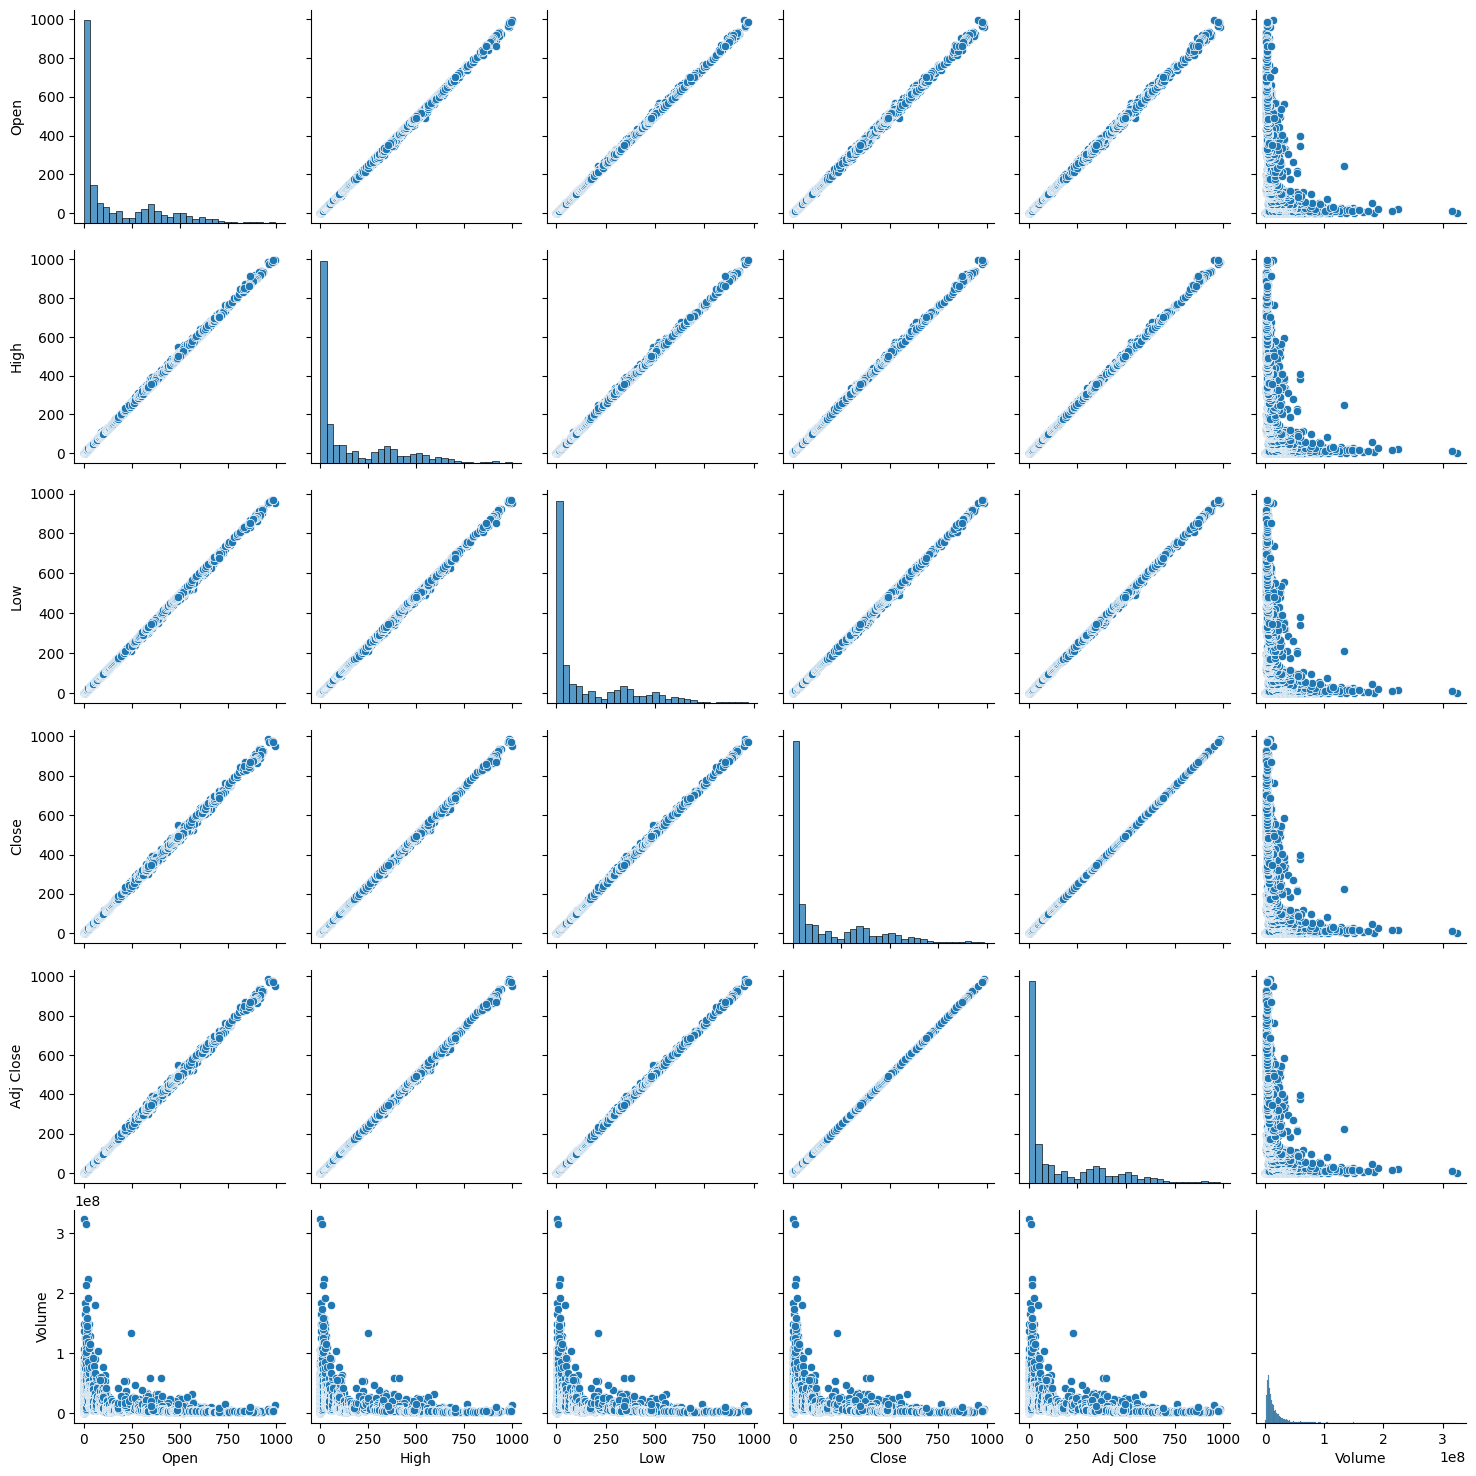

In [10]:
## Pair Plot
sns.pairplot(data)

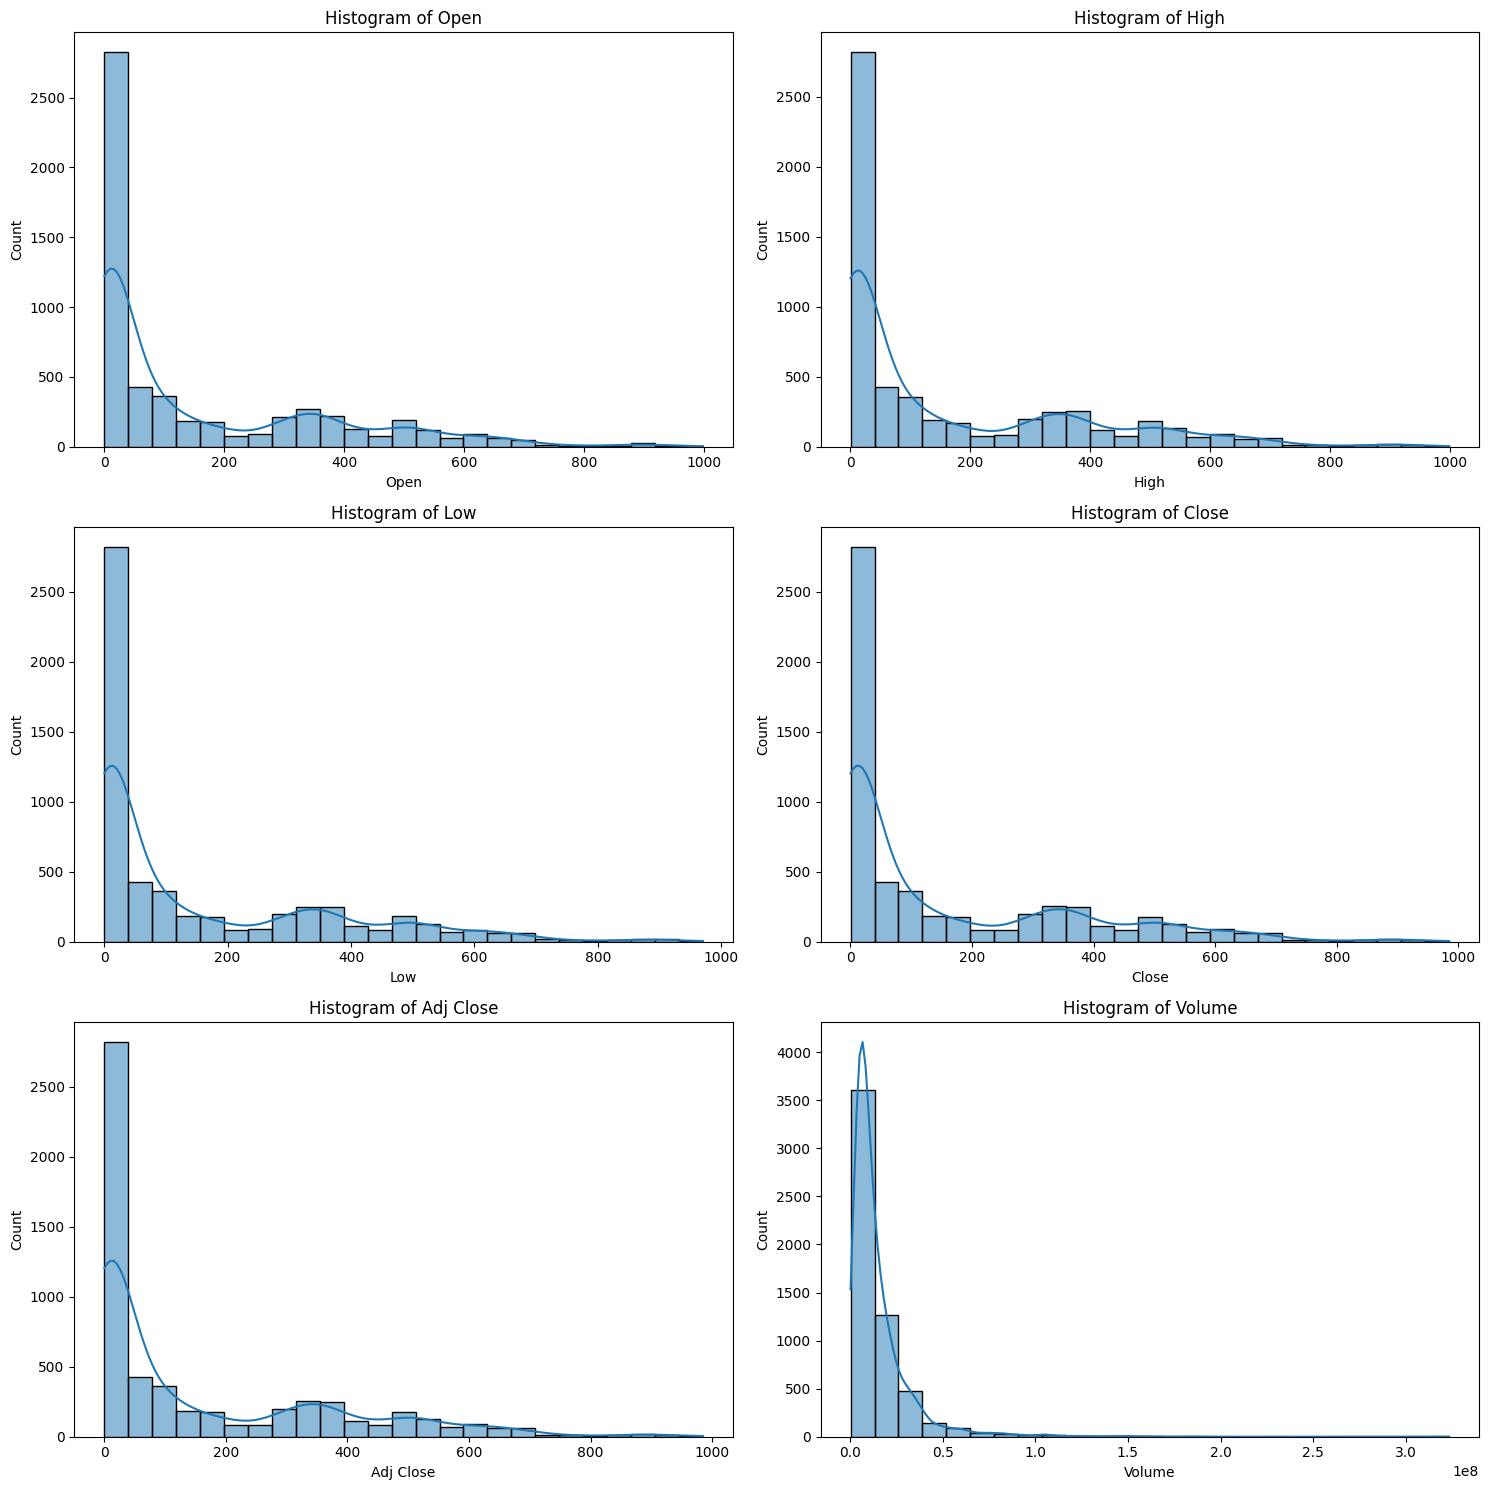

In [11]:
num_cols = data.drop('Date',axis=1)
plt.figure(figsize=(15,15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=25)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

<Axes: >

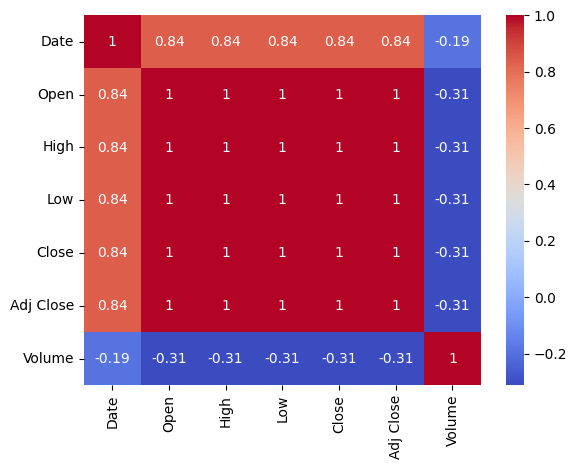

In [12]:
## Correlation Heatmap
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Model Training

In [13]:
## Dependent and Independent Features 
x = data.drop(['Adj Close','Date'], axis = 1)
y = data['Adj Close']

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
x_train.shape,x_test.shape

((3997, 5), (1713, 5))

In [16]:
x_train

,Open,High,Low,Close,Volume
1950,9.577143,9.614286,9.115714,9.324286,35298200
3620,103.980003,106.500000,103.550003,104.820000,8659500
3551,90.910004,91.720001,89.900002,91.480003,9099000
2657,12.185714,12.461429,12.057143,12.297143,16028600
798,2.342857,2.511429,2.342857,2.422857,36587600
...,...,...,...,...,...
1180,3.254286,3.304286,3.242857,3.258571,10256400
3441,99.779999,102.680000,99.000000,99.120003,20321100
1344,2.757143,3.008571,2.754286,3.001429,18057900
4623,516.429993,526.369995,502.700012,503.059998,6071200


In [17]:
## Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
## Model Training
from sklearn.svm import SVR
regressor = SVR()

In [21]:
regressor.fit(x_train_scaled,y_train)

SVR()

In [23]:
y_pred = regressor.predict(x_test_scaled)

In [27]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

5411.563215493549
18.316651008361962
0.8811575079794445


### HyperParameter Tuning using GridSearchCV

In [42]:
# Params
params = {'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
        }

In [43]:
model = SVR()

In [44]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=True)

In [45]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=True)

In [48]:
grid.best_score_

np.float64(0.9999732600516303)

In [49]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [50]:
y_pred = grid.predict(x_test_scaled)

In [51]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.08472348435105971
0.12717050815803096
0.9999981394008326


In [53]:
## Saving the best model using pickle
import pickle
pickle.dump(grid,open('model.pkl','wb'))